# Visualize

> This notebook visualizes the rate of spread of covid in Clark County, Nevada between Feb 1, 2020 and Oct 1, 2021. To do so we do a series of steps that are detailed in this notebook. The data is pulled from saved data found in `data/produced_data/nevada_covid_data.csv`. For more information on how this data was created, see `Data_Formatting.ipynb`

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Graphic Settings
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,10)})

## Load

> We load the necessary data and keep date as the index col for our visualization to have monthly/years points.

In [2]:
nevada_covid_df = pd.read_csv('data/produced_data/nevada_covid_data.csv', parse_dates = True, index_col='date')
nevada_covid_df['date'] = nevada_covid_df.index
nevada_covid_df

,order_code,Face_Masks_Required_in_Public,Source_of_Action,Citation,COUNTYFP,confirmed_cases,index,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,date
date,,,,,,,,,,,,,
2020-05-17,2,No,NaN,NaN,32003,5366,1748,0.027,0.032,0.054,0.145,0.742,2020-05-17
2020-05-18,2,No,NaN,NaN,32003,5463,1748,0.027,0.032,0.054,0.145,0.742,2020-05-18
2020-05-19,2,No,NaN,NaN,32003,5463,1748,0.027,0.032,0.054,0.145,0.742,2020-05-19
2020-05-20,2,No,NaN,NaN,32003,5650,1748,0.027,0.032,0.054,0.145,0.742,2020-05-20
2020-05-21,2,No,NaN,NaN,32003,5734,1748,0.027,0.032,0.054,0.145,0.742,2020-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,1,Yes,Official,Nev. Task Force Press Release (Mask guidance) ...,32003,289746,1748,0.027,0.032,0.054,0.145,0.742,2021-08-11
2021-08-12,1,Yes,Official,Nev. Task Force Press Release (Mask guidance) ...,32003,290632,1748,0.027,0.032,0.054,0.145,0.742,2021-08-12
2021-08-13,1,Yes,Official,"Nev. Task Force Press Release (Aug. 10, 2021) ...",32003,291502,1748,0.027,0.032,0.054,0.145,0.742,2021-08-13


## Rate of Spreading

> We need to find the rate of spread of covid. To do this we take the rate of change (differential) over a given time period. I take the difference between one day and the previous and fill any NA values (the first value) with a 0. I then take a rolling aveage of a window of 5 dates to smooth the curve. This is to reduce and unlikely and sporadic jumps.

In [3]:
slope = nevada_covid_df['confirmed_cases'] - nevada_covid_df.shift(periods=1)['confirmed_cases']
nevada_covid_df['slope'] = slope.fillna(0)
nevada_covid_df

,order_code,Face_Masks_Required_in_Public,Source_of_Action,Citation,COUNTYFP,confirmed_cases,index,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,date,slope
date,,,,,,,,,,,,,,
2020-05-17,2,No,NaN,NaN,32003,5366,1748,0.027,0.032,0.054,0.145,0.742,2020-05-17,0.0
2020-05-18,2,No,NaN,NaN,32003,5463,1748,0.027,0.032,0.054,0.145,0.742,2020-05-18,97.0
2020-05-19,2,No,NaN,NaN,32003,5463,1748,0.027,0.032,0.054,0.145,0.742,2020-05-19,0.0
2020-05-20,2,No,NaN,NaN,32003,5650,1748,0.027,0.032,0.054,0.145,0.742,2020-05-20,187.0
2020-05-21,2,No,NaN,NaN,32003,5734,1748,0.027,0.032,0.054,0.145,0.742,2020-05-21,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,1,Yes,Official,Nev. Task Force Press Release (Mask guidance) ...,32003,289746,1748,0.027,0.032,0.054,0.145,0.742,2021-08-11,632.0
2021-08-12,1,Yes,Official,Nev. Task Force Press Release (Mask guidance) ...,32003,290632,1748,0.027,0.032,0.054,0.145,0.742,2021-08-12,886.0
2021-08-13,1,Yes,Official,"Nev. Task Force Press Release (Aug. 10, 2021) ...",32003,291502,1748,0.027,0.032,0.054,0.145,0.742,2021-08-13,870.0


In [4]:
nevada_covid_df['avg_slope'] = nevada_covid_df['slope'].rolling(5).mean().fillna(0)
nevada_covid_df

,order_code,Face_Masks_Required_in_Public,Source_of_Action,Citation,COUNTYFP,confirmed_cases,index,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,date,slope,avg_slope
date,,,,,,,,,,,,,,,
2020-05-17,2,No,NaN,NaN,32003,5366,1748,0.027,0.032,0.054,0.145,0.742,2020-05-17,0.0,0.0
2020-05-18,2,No,NaN,NaN,32003,5463,1748,0.027,0.032,0.054,0.145,0.742,2020-05-18,97.0,0.0
2020-05-19,2,No,NaN,NaN,32003,5463,1748,0.027,0.032,0.054,0.145,0.742,2020-05-19,0.0,0.0
2020-05-20,2,No,NaN,NaN,32003,5650,1748,0.027,0.032,0.054,0.145,0.742,2020-05-20,187.0,0.0
2020-05-21,2,No,NaN,NaN,32003,5734,1748,0.027,0.032,0.054,0.145,0.742,2020-05-21,84.0,73.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11,1,Yes,Official,Nev. Task Force Press Release (Mask guidance) ...,32003,289746,1748,0.027,0.032,0.054,0.145,0.742,2021-08-11,632.0,761.6
2021-08-12,1,Yes,Official,Nev. Task Force Press Release (Mask guidance) ...,32003,290632,1748,0.027,0.032,0.054,0.145,0.742,2021-08-12,886.0,938.8
2021-08-13,1,Yes,Official,"Nev. Task Force Press Release (Aug. 10, 2021) ...",32003,291502,1748,0.027,0.032,0.054,0.145,0.742,2021-08-13,870.0,1112.8


## Subset
> Subset to data between Feb 1,2020 - Oct 1,2021 and find the date(s) (there is only one) where the mask mandate began.

In [5]:
feb_to_oct_nevada_covid_df = nevada_covid_df[(nevada_covid_df['date'] >= '2020-02-01') & (nevada_covid_df['date'] <= '2021-10-01')]
# first_date_of_mask = feb_to_oct_nevada_covid_df[feb_to_oct_nevada_covid_df['Face_Masks_Required_in_Public'] == 'Yes']['date'][0]

In [6]:
nevada_covid_df.to_csv('data/produced_data/slope_nevada_covid_df.csv',index=False)

## Constants

> These constants define colors for our visualization

In [305]:
COLORS = ['black', 'blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'brown', 'fuschia']
LABEL2COLOR = {}
for x,y in zip(COLORS, list(nevada_covid_df['Citation'].unique())):
    LABEL2COLOR[y] = x
LABEL2COLOR

{nan: 'black',
 'Nev. Guidance on Directive 024 (June 24, 2020)': 'blue',
 'Nev. Emerg. Declaration Directive 041 (Mar. 12, 2021)': 'green',
 'Nev. Emerg. Declaration Directive 044 (Apr. 19, 2021)': 'red',
 'Nev. Emerg. Declaration Directive 045 (May 3, 2021)': 'cyan',
 'Nev. Emerg. Declaration Directive 047 (July 27, 2021)': 'magenta',
 'Nev. Task Force Press Release (Mask guidance) (Aug. 3, 2021)': 'orange',
 'Nev. Task Force Press Release (Aug. 10, 2021) (Mask update)': 'brown'}

## Visualize

> We visualize three aspects here. 1) The rate of change of covid between days averaged over every 5 days. 2) The total number of cases / 100 (to fit on a reasonable scale for the y axis). 3) The vertical line (one cut) when face masks in public became mandatory. On top of all this, we add the state of emergency as federally mandated as different colors. These are issued warnings such as "Nev. Guidance on Direction 024", and "Nev. Task Force Press Release (Mask Update)". Finally we save this image as `mask_covid_spread.png`

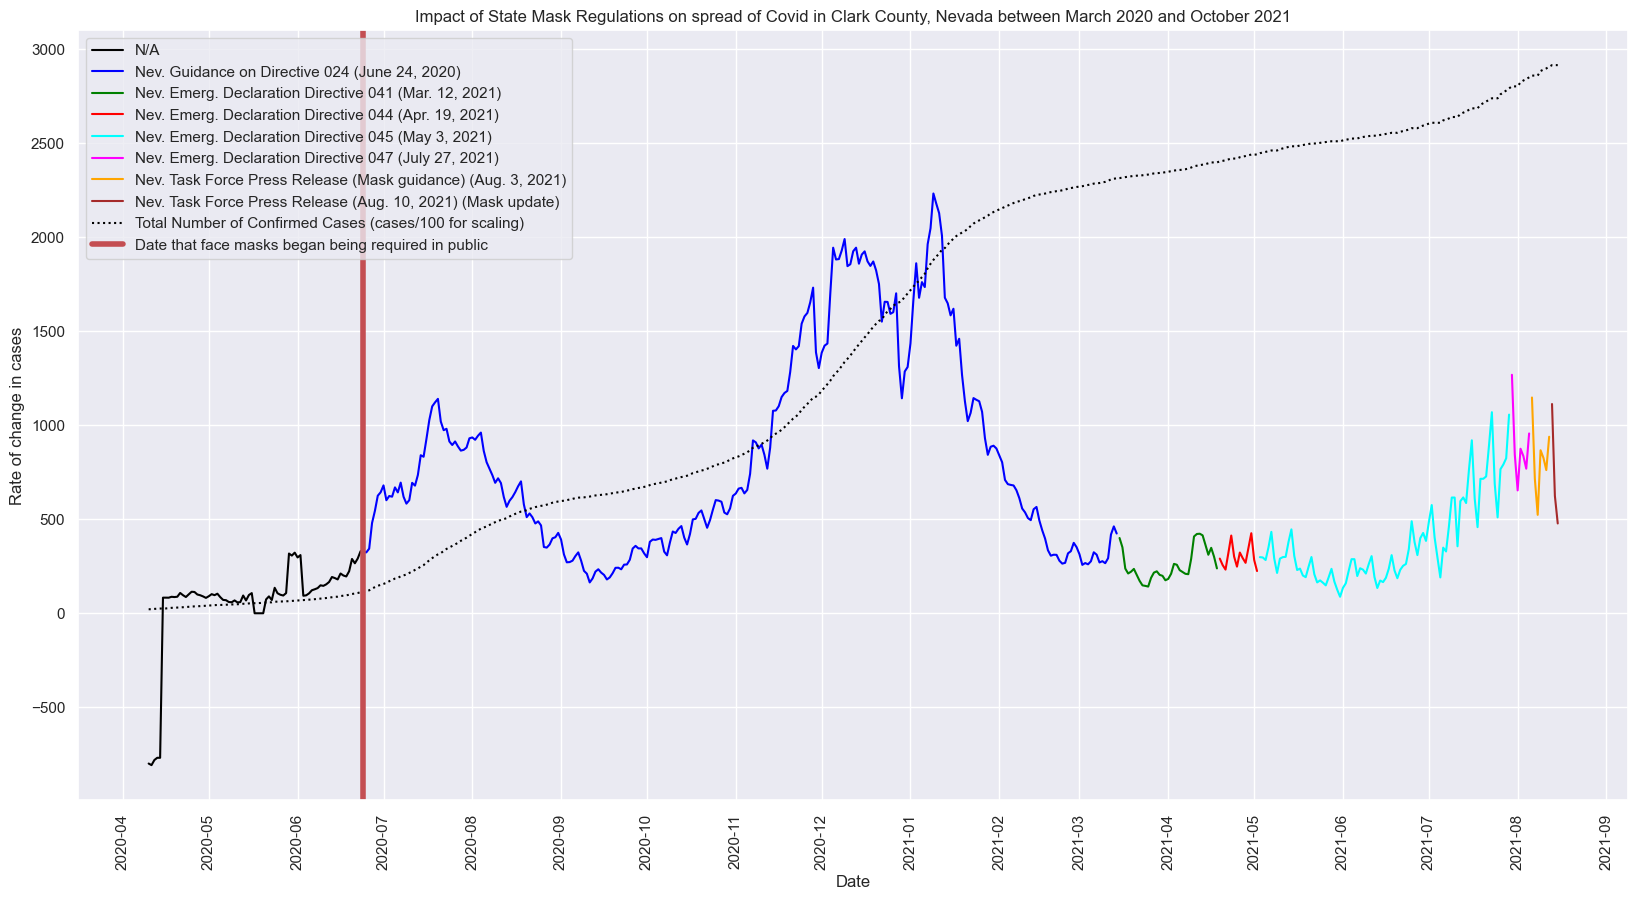

In [306]:
fig, ax = plt.subplots(figsize = (20,10))
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y-%m')
first = True


for label,color in LABEL2COLOR.items():
    if first:
        first = False
        sns.lineplot(data=feb_to_oct_nevada_covid_df[feb_to_oct_nevada_covid_df['Citation'].isnull()]['avg_slope'], ax=ax, color='black', label='N/A')
    else:
        sns.lineplot(data=feb_to_oct_nevada_covid_df[feb_to_oct_nevada_covid_df['Citation']==label]['avg_slope'], ax=ax, color=color, label=label)

sns.lineplot(data=feb_to_oct_nevada_covid_df['confirmed_cases']/100, ax=ax, color='black', label='Total Number of Confirmed Cases (cases/100 for scaling)', linestyle='dotted')
plt.axvline(first_date_of_mask, linewidth=4, color='r', label='Date that face masks began being required in public')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.title('Impact of State Mask Regulations on spread of Covid in Clark County, Nevada between March 2020 and October 2021')
plt.xlabel('Date')
plt.ylabel('Rate of change in cases')
plt.xticks(rotation = 'vertical')
plt.savefig('mask_covid_spread.png')
plt.show()